In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sbn
df = pd.read_csv('csv/new_dataset.csv')
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_posted_month'] = df.job_posted_date.dt.strftime('%b')
df['job_posted_month_number'] = df['job_posted_date'].dt.month
df = df.drop(columns=df.columns[0])
df.set_index('job_id')

,company_id,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,job_posted_month,name,skills,type,job_posted_month_number
job_id,,,,,,,,,,,,,,,,,,,,
0,0,Data Analyst,Marketing Data Analyst,Anywhere,via LinkedIn,Full-time,True,Serbia,2023-09-25 17:46:06,False,False,Serbia,NaN,NaN,NaN,Sep,Cryptology,sql,programming,9
0,0,Data Analyst,Marketing Data Analyst,Anywhere,via LinkedIn,Full-time,True,Serbia,2023-09-25 17:46:06,False,False,Serbia,NaN,NaN,NaN,Sep,Cryptology,python,programming,9
0,0,Data Analyst,Marketing Data Analyst,Anywhere,via LinkedIn,Full-time,True,Serbia,2023-09-25 17:46:06,False,False,Serbia,NaN,NaN,NaN,Sep,Cryptology,excel,analyst_tools,9
0,0,Data Analyst,Marketing Data Analyst,Anywhere,via LinkedIn,Full-time,True,Serbia,2023-09-25 17:46:06,False,False,Serbia,NaN,NaN,NaN,Sep,Cryptology,tableau,analyst_tools,9
0,0,Data Analyst,Marketing Data Analyst,Anywhere,via LinkedIn,Full-time,True,Serbia,2023-09-25 17:46:06,False,False,Serbia,NaN,NaN,NaN,Sep,Cryptology,power bi,analyst_tools,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452207,154,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Mar,Capital One,spark,libraries,3
1452207,154,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Mar,Capital One,hadoop,libraries,3
1452207,154,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Mar,Capital One,kafka,libraries,3


In [2]:
df_us = df[(df['job_title_short'] == 'Data Analyst')& (df['job_country']=='United States')]
df_canada = df[(df['job_title_short'] == "Data Analyst") & (df['job_country']=='Canada')]

In [3]:
df_canada_pivot = df_canada.pivot_table(index='job_posted_month_number', columns='skills', fill_value=0, aggfunc=('size'))
df_us_pivot = df_us.pivot_table(index='job_posted_month_number', columns='skills', fill_value=0, aggfunc=('size'))

In [4]:
df_canada_pivot.loc['Total'] = df_canada_pivot.sum()
df_us_pivot.loc['Total'] = df_us_pivot.sum()

In [5]:
df_canada_pivot = df_canada_pivot[df_canada_pivot.loc['Total'].sort_values(ascending=False).index]
df_us_pivot = df_us_pivot[df_us_pivot.loc['Total'].sort_values(ascending=False).index]
df_canada_pivot = df_canada_pivot.drop("Total")
df_us_pivot = df_us_pivot.drop('Total')

In [6]:
df_us_pivot_total = df_us.groupby('job_posted_month_number').size()
df_canada_pivot_total = df_canada.groupby('job_posted_month_number').size()

In [7]:
df_percent_usa = df_us_pivot.div(df_us_pivot_total/100, axis=0)
df_percent_canada = df_canada_pivot.div(df_canada_pivot_total/100, axis=0)

In [8]:
df_percent_canada = df_percent_canada.reset_index()
df_percent_canada['months_jobs'] = df_percent_canada['job_posted_month_number'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_percent_canada = df_percent_canada.set_index('months_jobs')

In [9]:
df_percent_canada = df_percent_canada.drop(columns='job_posted_month_number')

In [10]:
df_percent_usa = df_percent_usa.reset_index()
df_percent_usa['months_jobs'] = df_percent_usa['job_posted_month_number'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_percent_usa = df_percent_usa.set_index('months_jobs')
df_percent_usa = df_percent_usa.drop(columns='job_posted_month_number')
# df_percent_usa

In [22]:
from matplotlib.ticker import PercentFormatter

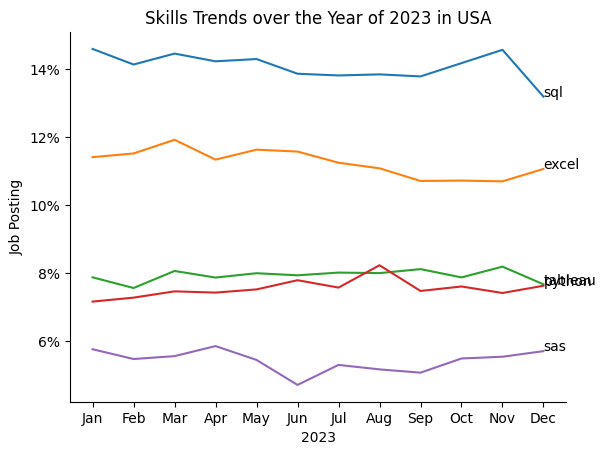

In [23]:
from matplotlib.ticker import PercentFormatter


df_usa_plot = df_percent_usa.iloc[:, :5]
sbn.lineplot(df_usa_plot, dashes=False)
sbn.despine()
plt.legend().remove()
plt.xlabel('2023')
plt.title("Skills Trends over the Year of 2023 in USA")
plt.ylabel('Job Posting')
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
# Let add the the text at the end of each linein the graph
for i in range(5):
    plt.text(11, df_usa_plot.iloc[-1,i], df_usa_plot.columns[i])

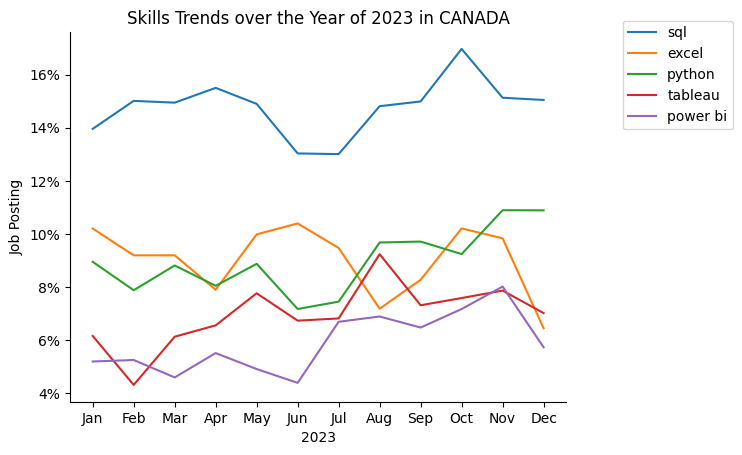

In [36]:
from matplotlib.transforms import Bbox


df_canada_plot = df_percent_canada.iloc[:, :5]
sbn.lineplot(df_canada_plot, dashes=False)
sbn.despine()
# plt.legend().remove()
plt.xlabel('2023')
plt.title("Skills Trends over the Year of 2023 in CANADA")
plt.ylabel('Job Posting')
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
ax = plt.subplot(111)
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [13]:
# df_percent_canada